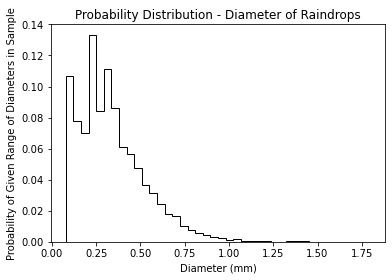

In [2]:
#Sam Krysko - 21018553
#PHYS 267 Final Project Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import sympy as sy

#First, import the area data from a csv file to pandas dataframe then to numpy array
df = pd.read_csv('Results.csv')
droplet_areas_pix = df.to_numpy()[:,1]

#The given data has areas of pixels^2, so to get it into a more tangible form, the area will be converted to m^2, and then further converted to diameter of each drop
#Also in the data, there are some measurements of the length and width of the area where the initial image was taken, to get an estimate of converting the areas in pixels
#to areas in m^2 by finding the ratio of pixels/m.

pic_length_m_string = df.to_numpy()[1:7,5]
pic_width_m_string = df.to_numpy()[1:7,6]
pic_length_pix_string = df.to_numpy()[13, 5]
pic_width_pix_string = df.to_numpy()[13,6]

pic_len_m = pic_length_m_string.astype(float)
pic_wid_m = pic_width_m_string.astype(float)
pic_len_pix = float(pic_length_pix_string)
pic_wid_pix = float(pic_width_pix_string)

#first step is to find the sample mean of each measured length and width
#avg_length_m = sum(pic_length_m)/len(pic_length_m)
avg_len_m = sum(pic_len_m)/len(pic_len_m)
avg_wid_m = sum(pic_wid_m)/len(pic_wid_m)

#now, find the uncertainty in these values using the standard error in a sample as Var = stdev^2/N
unc_len_m = np.std(pic_len_m) / len(pic_len_m)**(1/2)
unc_wid_m = np.std(pic_len_m) / len(pic_len_m)**(1/2)

#thus, the uncertainty in each value is given by the square root of the values above, and then to get the ratio of pixels/m
con_pixm1 = pic_len_pix / avg_len_m
con_pixm2 = pic_wid_pix / avg_wid_m

#then, take a weighted mean using the the inverse-variance weighting method, the variances of each are given by the univariate case of dividing two values b/c the size of the image in pixels has zero uncertainty
unc_con_pixm1 = unc_len_m*(pic_len_pix/avg_len_m**2)
unc_con_pixm2 = unc_wid_m*(pic_wid_pix/avg_wid_m**2)

con_pixm = ((con_pixm1)*(1/unc_con_pixm1**2) + (con_pixm2)*(1/unc_con_pixm2**2)) / ((1/unc_con_pixm1**2) + (1/unc_con_pixm2**2))
unc_con_pixm = np.sqrt(unc_con_pixm1**2 + unc_con_pixm2**2)

#then, convert the areas of the droplets in pixels^2 to diameter in pixels by approximating each one as a perfect circle and using d = 2*sqrt(A/2*pi)
droplet_diam_pix = [2*np.sqrt(droplet_areas_pix[i] / (2*np.pi)) for i in range(0,len(droplet_areas_pix))]

#finally, use the conversion to determine the diameter of each drop in meters as well as the uncertainty in each using the univariate case
droplet_diam = [droplet_diam_pix[i]/con_pixm *1000 for i in range(0,len(droplet_diam_pix))]
droplet_diam_unc = [unc_con_pixm*(droplet_diam[i] / con_pixm**2) * 1000 for i in range(0,len(droplet_diam_pix))]

#finally, histogram the data to get the initial probability distribution for the diameters of the droplets
#note that the density argument on plt.hist() is not working correctly for the data, so I normalized the data first
plt.hist(droplet_diam, bins  = 40, weights  = 1/len(droplet_diam) * np.ones(len(droplet_diam)), histtype = 'step', color = 'k')
plt.title('Probability Distribution - Diameter of Raindrops')
plt.xlabel('Diameter (mm)')
plt.ylabel('Probability of Given Range of Diameters in Sample')
plt.savefig('diameterhist.jpg')
plt.show()


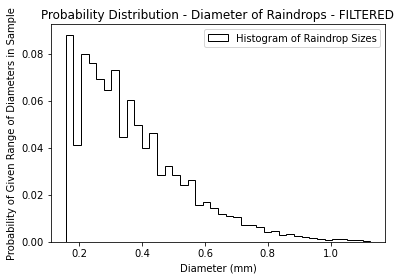

0.15762605210246164 1.125675169563496
0.00013653372685239323 0.0009750458383985852


In [7]:
#now, to filter the data a little bit perform the same conversions but on a new dataset of filtered data
droplet_areas_pix_f = df.to_numpy()[2060:14288,1]

#NOTE: the same conversion factors will be used as before, just with a smaller dataset

#then, convert the areas of the droplets in pixels^2 to diameter in pixels by approximating each one as a perfect circle and using d = 2*sqrt(A/2*pi)
droplet_diam_pix_f = [2*np.sqrt(droplet_areas_pix_f[i] / (2*np.pi)) for i in range(0,len(droplet_areas_pix_f))]

# use the conversion to determine the diameter of each drop in meters as well as the uncertainty in each using the univariate case
droplet_diam_f = [droplet_diam_pix_f[i]/con_pixm *1000 for i in range(0,len(droplet_diam_pix_f))]
droplet_diam_unc_f = [unc_con_pixm*(droplet_diam_f[i] / con_pixm**2) * 1000 for i in range(0,len(droplet_diam_pix_f))]

#finally, histogram the data to get the initial probability distribution for the diameters of the droplets, also plot the poisson approximation
#note that the density argument on plt.hist() is not working correctly for the data, so I normalized the data first
plt.hist(droplet_diam_f, bins  =40, weights  = 1/len(droplet_diam_f) * np.ones(len(droplet_diam_f)), histtype = 'step', color = 'k', label = 'Histogram of Raindrop Sizes')
plt.title('Probability Distribution - Diameter of Raindrops - FILTERED')
plt.xlabel('Diameter (mm)')
plt.ylabel('Probability of Given Range of Diameters in Sample')
plt.legend()
plt.savefig('diameterhist_filtered.jpg')
plt.show()

#min and max size which are first and last values in the list because it is ordered
min_diam = droplet_diam_f[0]
max_diam = droplet_diam_f[-1]
min_diam_unc = droplet_diam_unc_f[0]
max_diam_unc = droplet_diam_unc_f[-1]

print(min_diam, max_diam)
print(min_diam_unc, max_diam_unc)

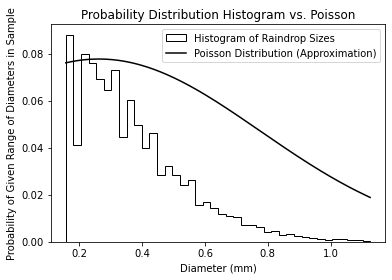

0.26285180476517067

In [4]:
#now, to filter the data a little bit perform the same conversions but on a new dataset of filtered data
droplet_areas_pix_f = df.to_numpy()[2060:14288,1]

#NOTE: the same conversion factors will be used as before, just with a smaller dataset

#then, convert the areas of the droplets in pixels^2 to diameter in pixels by approximating each one as a perfect circle and using d = 2*sqrt(A/2*pi)
droplet_diam_pix_f = [2*np.sqrt(droplet_areas_pix_f[i] / (2*np.pi)) for i in range(0,len(droplet_areas_pix_f))]

# use the conversion to determine the diameter of each drop in meters as well as the uncertainty in each using the univariate case
droplet_diam_f = [droplet_diam_pix_f[i]/con_pixm *1000 for i in range(0,len(droplet_diam_pix_f))]
droplet_diam_unc_f = [unc_con_pixm*(droplet_diam_f[i] / con_pixm**2) * 1000 for i in range(0,len(droplet_diam_pix_f))]

#first, find the mean diameter using inverse variance weighted mean
mean_num = 0
mean_denom = 0
for i in range(0,len(droplet_diam_f)):
    mean_num += droplet_diam_unc_f[i]**(-2)*droplet_diam_f[i]
    mean_denom += droplet_diam_unc_f[i]**(-2)
    
mean = mean_num / mean_denom

#define the normalized (for this data) Gaussian Poisson distribution approximation
def pois_approx(r, mu):
    return 1/10*1/np.sqrt(2*np.pi*mu) * np.exp(-0.5*(r-mu)**2 / mu)


#define the probabilities
probs = [pois_approx(droplet_diam_f[i], mean) for i in range(0,len(droplet_diam_f))]

#finally, histogram the data to get the initial probability distribution for the diameters of the droplets, also plot the poisson approximation
#note that the density argument on plt.hist() is not working correctly for the data, so I normalized the data first
plt.hist(droplet_diam_f, bins  =40, weights  = 1/len(droplet_diam_f) * np.ones(len(droplet_diam_f)), histtype = 'step', color = 'k', label = 'Histogram of Raindrop Sizes')
plt.plot(droplet_diam_f, probs, 'k', label = 'Poisson Distribution (Approximation)')
plt.title('Probability Distribution Histogram vs. Poisson')
plt.xlabel('Diameter (mm)')
plt.ylabel('Probability of Given Range of Diameters in Sample')
plt.legend()
plt.savefig('diameterhist_filtered_withpoisson.jpg')
plt.show()

mean